# Beginning Set-up

In [85]:
import pandas as pd

folder_path = '../Final Data/final_data.csv'

real_df = pd.read_csv(folder_path)


# Delete before submission, for sample data set only

In [86]:
df = real_df.head(100)

df.to_csv('../Final Data/subset_final_data.csv', index=False)

In [ ]:
# from plotnine import ggplot, aes, geom_point, labs

In [87]:
# Print unique values in the 'Airline Company' column
# Remove unwanted parts from the 'Airline Company' column
df['Airline Company'] = df['Airline Company'].str.replace("'name': '", '').str.replace("'", '')

# Print unique values in the cleaned 'Airline Company' column
print(df['Airline Company'].unique())

['delta air lines' 'alitalia' 'klm' 'latam airlines' 'virgin atlantic'
 'westjet' 'aeromexico' 'air france' 'korean air' 'spirit airlines'
 'southwest airlines' 'alaska airlines' 'gulf air' 'qantas'
 'qatar airways' 'american airlines' 'pakistan international airlines'
 'singapore airlines' 'turkish airlines']


/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/2389211061.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
# only need to run once 
df['delay in mins'] = pd.to_numeric(df['delay in mins'].str.replace("'delay':", ''), errors='coerce')

df['departure airport IATA'] = df['departure airport IATA'].str.replace("'iataCode': '", '').astype(str)

df['arrival airport IATA'] = df['arrival airport IATA'].str.replace("'iataCode': '", '').astype(str)

df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'].str.replace("'delay':", ''), errors='coerce')


/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/4122351443.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/4122351443.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/4122351443.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

AttributeError: Can only use .str accessor with string values!

# Exhibit 1 - Does departure delay must lead to an arrival delay? 
## Note to self (kylin): create one for different arrival airports and departure airports, by modifying the code
- different for different airlines 
- their ability to catch-up is different

Index(['departure airport IATA', 'arrival airport IATA', 'delay in mins',
       'estimatedDelay', 'Airline Company', 'month_day'],
      dtype='object')


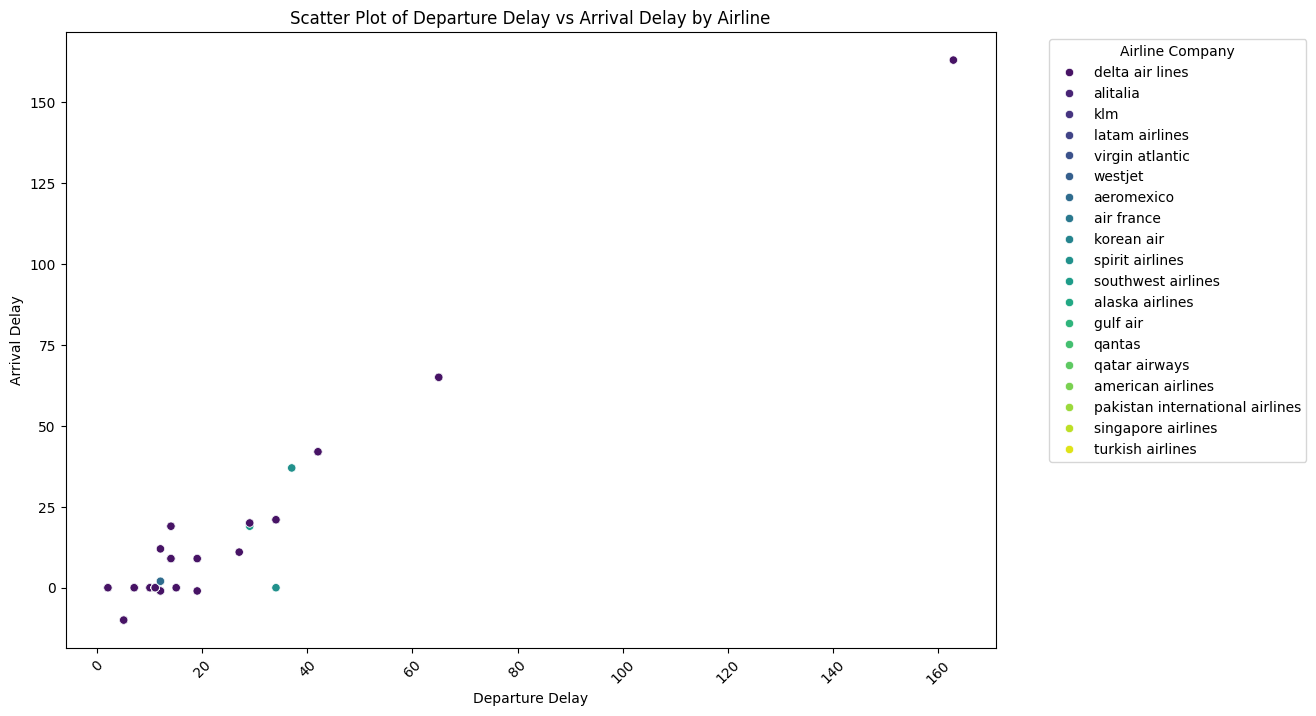

In [89]:
# good, colorful and good dots, don't touch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# Print the column names to identify the correct ones
print(df.columns)

# Adjust the column names based on your actual dataset
x_column = 'delay in mins'  # Replace with the correct column name
y_column = 'estimatedDelay'  # Replace with the correct column name

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_column, y=y_column, hue='Airline Company', data=df, palette='viridis')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set plot labels and title
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Scatter Plot of Departure Delay vs Arrival Delay by Airline')

# Show legend
plt.legend(title='Airline Company', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


# Exhibit 2 - How does departure delay compares to arrival delay for your flight? 
* should have all parameters 
* find a few options to demonstrate 

In [90]:
# need to change label content - a dot with a label, with hover- over, with regression line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport, airline, and destination airport
departure_airport = input("Enter departure airport (e.g., ATL): ").lower()
airline = input("Enter airline (e.g., Delta Air Lines): ").lower()
destination_airport = input("Enter destination airport (e.g., RSW): ").lower()

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['Airline Company'] == airline) &
                 (df['arrival airport IATA'] == destination_airport)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    fig_delay = px.scatter(filtered_df, x='delay in mins', y='estimatedDelay', title=f'place holder title {airline.upper()} Airline to {destination_airport.upper()}',
                 labels={'delay in mins': 'departure delay', 'estimatedDelay': 'arrival delay'},
                 hover_name='arrival airport IATA',
                 hover_data={'arrival airport IATA': False, 'delay in mins': True, 'estimatedDelay': '|%B %d, %Y %I:%M %p'},
                 trendline='ols',  # Ordinary Least Squares regression line
                 )
fig_delay.show()


In [94]:
# worked - sorted, consolidated, and has input command
import pandas as pd

# Assuming the column names in your dataset are 'departure airport IATA', 'arrival airport IATA', 'delay in mins', 'estimatedDelay', 'Airline Company'

# Convert 'estimatedDelay' to numeric (if it's not already)
df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'], errors='coerce')

# Get user input for the departure airport IATA code
user_departure_airport = input("Enter the departure airport IATA code: ").strip()

# Filter for flights departing from the specified airport
df_user_departure = df[df['departure airport IATA'].str.contains(user_departure_airport, na=False)]
# Extract the actual airport code from the strings in the 'arrival airport IATA' column
# average_delay_df['arrival airport IATA'] = average_delay_df['arrival airport IATA'].str.extract(r"'iataCode': '(.*?)'")

# Create a DataFrame with average estimatedDelay for each arrival airport
average_delay_df = df_user_departure.groupby('arrival airport IATA').agg({'estimatedDelay': 'mean'}).reset_index()

# Print the resulting DataFrame
print(average_delay_df)


/var/folders/ks/3v7x0r1s22nc17bqx7_0rhjr0000gn/T/ipykernel_13266/71093671.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   arrival airport IATA  estimatedDelay
0                   ams       42.000000
1                   avl        0.000000
2                   boi       20.000000
3                   bwi       19.000000
4                   cdg       65.000000
5                   cvg        9.000000
6                   dfw             NaN
7                   dtw        0.000000
8                   dub      163.000000
9                   elp        0.000000
10                  fll        0.000000
11                  hpn        0.000000
12                  iad        2.000000
13                  iah        7.714286
14                  ind       11.000000
15                  ist       67.000000
16                  jan      -10.000000
17                  mco       37.000000
18                  pbi       -1.000000
19                  pns       65.000000
20                  rsw       12.000000
21                  sat       -1.000000
22                  sfo        0.000000
23                  sna       21.000000


In [95]:
# good final - gives iata, estimated delay, long, lat
# Merge the DataFrames on the common column 'arrival airport IATA' and 'code'
merged_df = average_delay_df.merge(airports_df, left_on='arrival airport IATA', right_on='code', how='left')

# Drop the redundant columns
merged_df = merged_df[['arrival airport IATA', 'estimatedDelay', 'longitude', 'latitude']]

# Print the resulting DataFrame
print(merged_df)

   arrival airport IATA  estimatedDelay            longitude  \
0                   ams       42.000000    4.741505200022974   
1                   avl        0.000000   -82.54088095049624   
2                   boi       20.000000           -116.22193   
3                   bwi       19.000000            -76.66894   
4                   cdg       65.000000   2.5710819691019156   
5                   cvg        9.000000            -84.66145   
6                   dfw             NaN    -97.0465220537124   
7                   dtw        0.000000   -83.35297537621658   
8                   dub      163.000000   -6.247592522077657   
9                   elp        0.000000  -106.36664263248113   
10                  fll        0.000000   -80.15099673135214   
11                  hpn        0.000000   -73.70833333823488   
12                  iad        2.000000    -77.4534849116007   
13                  iah        7.714286   -95.33298595614491   
14                  ind       11.000000 

In [96]:
import matplotlib.pyplot as plt 
import pandas as pd
import geopandas as gpd

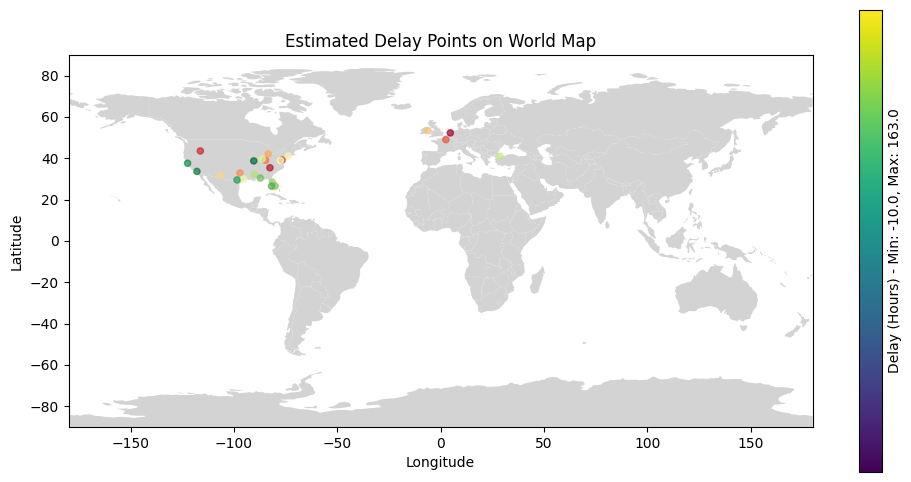

In [98]:
# good graph, good legend, don't touch
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Assuming you have the 'worldmap' and 'merged_df' DataFrames

# Merge the world map with the merged_df based on latitude and longitude
globe_df = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['longitude'], merged_df['latitude']))

# Determine the color range and normalization
vmin = merged_df['estimatedDelay'].min()
vmax = merged_df['estimatedDelay'].max()

# Create a diverging colormap
cmap = 'RdYlGn'

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 6)) 
worldmap.plot(color="lightgrey", ax=ax)

# Plot the points with different colors based on the magnitude of estimatedDelay
scatter = globe_df.plot(ax=ax, markersize=20, alpha=0.7, c=merged_df['estimatedDelay'], cmap=cmap, vmin=vmin, vmax=vmax)

# Add a colorbar
cbar = plt.colorbar(scatter.get_children()[0], ax=ax, orientation='vertical', label=f'Delay (Hours) - Min: {vmin}, Max: {vmax}', ticks=[vmin, vmax])

# Creating axis limits and title 
plt.xlim([-180, 180]) 
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Estimated Delay Points on World Map")
plt.show()


# Exhibit 3 - does Ryanair delay more than other airlines? 

does RyanAir suck more than the other airlines? Use bar chart to show how much ryanair delay is compared to other airlines flying out of the same airport and flying to the same airport

1. filter the data set by depart/ arrival airport 
2. compile data from the different airlines (so there is one representative name for each airline)
3. show the average (arrival and departure) delay in a bar chart 

crazy idea: exhibit x - can you make it? 
1. user input departure / arrival airport 
2. get the *mean* departure delay for route and *standard deviation* of the routes, not discriminating based on airlines 
3. assume that the flight delays happens on a normal distribution
4. get the probability that you will still make it if you are running 5 / 10 / 15 minutes late
